## Chapter 2. Integration with NMF🦅 (Non-negative Matrix Factorization)
In Chapter 1 Data Loading and Preprocessin, you have learned how to read multi-omics datasets using pandas🐼🐼in Python, handle missing values, and integrate them into a simple matrix. In  Chapter2, you will learn how to use NMF (Non-negative Matrix Factorization) to decompose matrices and extract latent features from the **CNV (Copy Number Variation)** dataset.
NMF is a extension of PCA


## 
## 2.1 What is Non-negative Matrix Factorization (NMF)

## 🦅2.1.1 NMF Formula with Norm Decomposition

##### NMF Formula : NMF decomposes a non-negative matrix $V$ into two non-negative matrices $ W $and $H$

##  <span style="color:Purple">$$ V \approx WH $$  </span>
##  <span style="color:Purple">$$ V_{m \times n} \approx W_{m \times k}H_{k \times n} $$
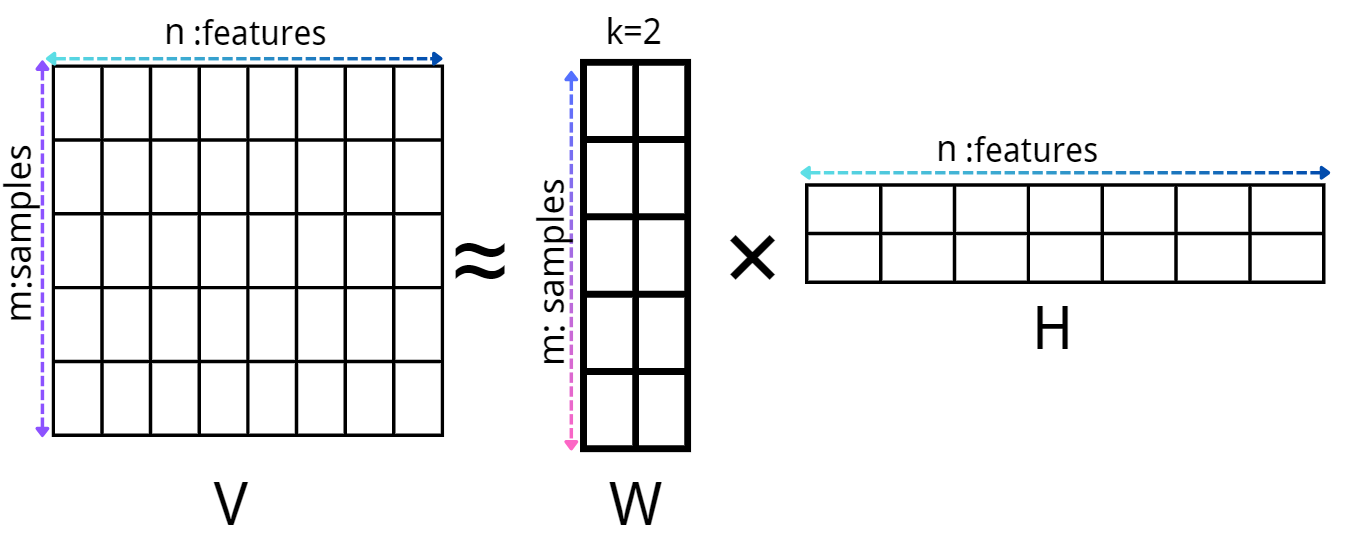 
##### where:
   
-  **V**  is the <u>**original non-negative matrix ** </u>$ V_{m \times n} $.
    **$ m $**   represents the number of samples.
    **$ n $**  represents the number of features.


-  **W**  is the basis matrix $ W_{m \times k} $.

-  **H** is the coefficient matrix **k** is the number of latent features, <span style="color:Purple">$ H_{k \times n}( k \ll \min(m, n) )$.






 The **Frobenius norm** is defined as:</span>

$$ \| A \|_F = \sqrt{\sum_{i,j} a_{ij}^2} $$</span>

The objective is to minimize the **reconstruction error**, often measured using the **Frobenius norm**:</span>

$$ \min_{W, H} \| V - WH \|_F $$</span>


##  


## 🦅2.1.2 NMF Imprementation Example


##  🎬Example
Here, we construct the matrix and dataframe for $ V_{m \times n} $ as <u>the originalnon-negative matrix($ V \approx WH $)</u> using the `numpy` and `pandas` package.
- `numpy` generates a numerical marix which only has the numbers. 
- `pandas` assigsn column and row names to $V$ and convert it into a DataFrame
- `np.random.randn()`generates data from a **standard normal distribution**$N(0, 1) $, which means the data has been **normalized**.

```python
import numpy as np
np.random.seed(0)
V = np.abs(np.random.randn(10, 5))

import pandas as pd
df_V = pd.DataFrame(V, columns=[f"Sample{i+1}" for i in range(5)], index=[f"Gene{i+1}" for i in range(10)])
df_V
```
  ❓Question:  In this $ V_{m \times n}$ below, $m $= ?, $n$=? (**$ m $** : the number of samples.**$ n $** : the number of features.)






##### ▶️ Run the code below to see the data `df_V` and answer the❓ Question

## 🎬 Step1 Construct the NMF model
Fisrt we should import `NMF` 🦅function from the `sklearn` package
```python
from sklearn.decomposition import NMF
```
Next we will use the `NMF`🦅 fuction to construct the NMF model:
```python
 NMF(n_component= ,init=' ', random_date= )
```
- `n_components=2` means we can reduce the data to 2 features.

-  `init`Determines the initialization method for the NMF algorithm.
  `init='random'` initializes the matrices with random values.
 
-  `random_state` Controls the seed of the random number generator for reproducibility.
 `random_state=0` ensures that the random initialization produces the same result every time you run the code.

##### Example code📋 
```python
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=2, init='random', random_state=0)
nmf_model
```
##### ▶️ Run the code below to see the NMF model

## 🎬 Step2 Calculate the W
From the W matrix, we can observe the similarity of each sample in the new feature space, which is useful for subtypes classification.
we can use `.fit_transform()` in` NMF `function to calculate $W$ :
```python
W = [model name].fit_transform([Numerical Matrix ])
```
⚠️**Note: The input to fit_transform must be a <u>[ Numerical Matrix.]</u>**
##### Example code📋 
```python
W = nmf_model.fit_transform(V)
W
```
##### ▶️ Run the code below to see the two components

## 🎬 Step 3 construct a dataframe for W

##### Example code📋 
The obtained $W$ is a numerical matrix.  To make the matrix accessible for integration with other datasets, it is necessary to convert $W$ into a DataFrame format.

- `index=[data frame].index`:This is to ensure that the data is aligned with the column names of the data frame.
- `columns=['Component1','Component2']`:This is to add column names to the two principal components. It can also be 3 components as`['Component1','Component2','Component3']`

##### Example code📋 
```python
df_W = pd.DataFrame(W, index=df_V.index, columns=['Component1','Component2'])
df_W
```
##### ▶️ Run the code below to see the dataframe $W$


##  


## 🦅2.3 NMF Imprementation Exercise 
Use the data below to conduct a NMF analysis
```python
base_url = "https://raw.githubusercontent.com/WanbingZeng/OMINEX/main/data/"
x1 = pd.read_csv(base_url + "COREAD_gex.csv", index_col=0).T
x2 = pd.read_csv(base_url + "COREAD_mu.csv", index_col=0).T
x3 = pd.read_csv(base_url + "COREAD_cn.csv", index_col=0).T
covariates = pd.read_csv(base_url+"COREAD_subtypes.csv", index_col=0, header=0)

```
##### ▶️ Run the code below and use Frobenius norm normalization to construct a NMF model and create the dataframe.

🔑 ...recommend to look through the entire process

In [ ]:

# 特征归一化
x1_featnorm = x1.div(x1.sum(axis=1), axis=0)
x2_featnorm = x2.div(x2.sum(axis=1), axis=0)
x3_featnorm = x3.div(x3.sum(axis=1), axis=0)

combined_data = pd.concat([x1, x2, x3], axis=0)
show(combined_data)
# 按每个omics类型的Frobenius范数归一化
x1_featnorm_frobnorm = x1_featnorm / norm(x1_featnorm.values, 'fro')
x2_featnorm_frobnorm = x2_featnorm / norm(x2_featnorm.values, 'fro')
x3_featnorm_frobnorm = x3_featnorm / norm(x3_featnorm.values, 'fro')

# # 将CNV矩阵的特征拆分为两个非负特征
# # x3_featnorm_frobnorm_nonneg = split_neg_columns(x3_featnorm_frobnorm.T).T

# # 运行NMF
nmf_model = NMF(n_components=2, init='random', random_state=0)
W = nmf_model.fit_transform(combined_data.values)
H = nmf_model.components_
# 创建包含H矩阵和CMS标签（子类型）的数据框
nmf_df = pd.DataFrame(H.T, columns=['dim1', 'dim2'])
nmf_df['subtype'] = covariates['subtypes'].values

# 使用Plotly绘制交互式NMF散点图
fig = px.scatter(nmf_df, x='dim1', y='dim2', color='subtype', title='Scatter plot of 2-component NMF for multi-omics integration')
fig.show()
# 标准化 H 矩阵
scaler = StandardScaler()
H_scaled = scaler.fit_transform(H.T)
H_scaled_df = pd.DataFrame(H_scaled, index=combined_data.columns, columns=['Component 1', 'Component 2'])

# 创建子类型颜色映射
subtype_colors = nmf_df['subtype'].map({'CMS1': 'red', 'CMS3': 'blue'})

# 进行层次聚类
row_clusters = linkage(H_scaled_df.T, method='ward', metric='euclidean')
col_clusters = linkage(H_scaled_df, method='ward', metric='euclidean')

# 绘制带有层次聚类的热图
sns.set(context='talk', style='white')
g = sns.clustermap(H_scaled_df.T, row_linkage=row_clusters, col_linkage=col_clusters,
                   col_colors=subtype_colors, cmap='viridis', figsize=(12, 10),
                   cbar_kws={'label': 'Expression Level'})

# 添加标题和标签
plt.title('Hierarchical Clustering of NMF Components')

# 添加自定义图例
for label in ['CMS1', 'CMS3']:
    g.ax_col_dendrogram.bar(0, 0, color=subtype_colors[nmf_df['subtype'] == label][0],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=2)

plt.show()